## <center>CITS5508 Lab sheet 4: Ensemble Classifiers and Random Forest Regressors</center>

**Name: Samuel Heath**<br>
**Student number: 21725083**<br>

## Project 1 - Ensemble on Parkinsons Data
### Summary:
- Load and clean data.
- Remove Classes that dont have enough instances.
- Remove unneeded features and scale the dataset.
- Train Voting Classifier Ensemble with Logistic Regression and SVM classifiers.

##### Load Data from `./parkinsons.data`

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from six.moves import urllib

# Set the random seed to ensusre consistent results
random_seed = 12

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# Download CSV, status 1 = Parkinsons,  0 = unhealthy
with urllib.request.urlopen(data_url) as response:
    data = response.read().decode('utf8')
    out = open('./parkinsons.data', 'w')
    out.write(data)
    out.close()

park_data = pd.read_csv('./parkinsons.data')

park_data = park_data.drop('name', axis=1)  
print(park_data.head())
park_data.describe()

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0   0.00370   0.00554     0.01109       0.04374             0.426    ...      
1   0.00465   0.00696     0.01394       0.06134             0.626    ...      
2   0.00544   0.00781     0.01633       0.05233             0.482    ...      
3   0.00502   0.00698     0.01505       0.05492             0.517    ...      
4   0.00655   0.00908     0.01966       0.06425             0.584    ...      

   Shimmer:DDA      NHR     HNR  status     

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


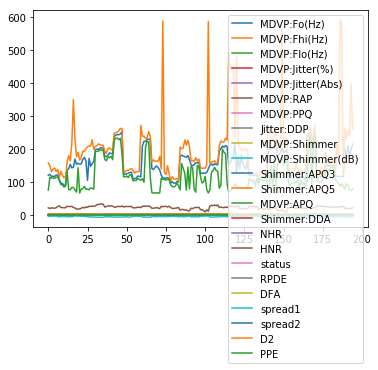

In [2]:
park_data.plot()
plt.show()

From the Plot we see there are a few variables which are highly weighted due to the difference in the variables scales.

In [3]:
park_data = park_data.drop(["MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)"], axis=1)
park_data.corr()

,MDVP:Fo(Hz),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Jitter(Abs),-0.382027,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058
Shimmer:APQ3,-0.094717,0.697153,0.744912,0.763580,0.744894,0.987625,0.963198,1.000000,0.960070,0.896645,1.000000,0.716207,-0.827123,0.347617,0.435242,0.151124,0.610967,0.402243,0.467265,0.645377
Shimmer:APQ5,-0.070682,0.648961,0.709927,0.786780,0.709907,0.982835,0.973751,0.960070,1.000000,0.949146,0.960072,0.658080,-0.813753,0.351148,0.399903,0.213873,0.646809,0.457195,0.502174,0.702456
MDVP:APQ,-0.077774,0.648793,0.737455,0.804139,0.737439,0.950083,0.960977,0.896645,0.949146,1.000000,0.896647,0.694019,-0.800407,0.364316,0.451379,0.157276,0.673158,0.502188,0.536869,0.721694


We should remove some of these columns which are not particularly useful to us.

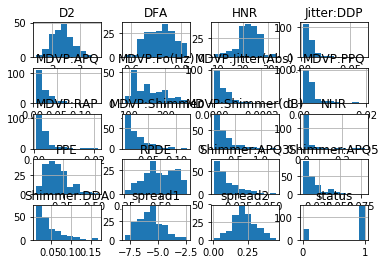

In [4]:
park_data.hist()
plt.show()



## Split the dataset into training and testing datasets


In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

# Shuffle then split the dataset into 80/20 (training/testing) sets. 
# Using Stratified so that the distribution of positive and negative status are evenly split between the test and training sets.
sss = StratifiedShuffleSplit(random_state=random_seed, test_size=0.2, train_size=0.8)

# Have not separated the status before performing the split as it is easier.

# Perform the split and assign the X_train and X_test sets, then
for train_index, test_index in sss.split(park_data, park_data.status):
    X_train, X_test = park_data.iloc[train_index], park_data.iloc[test_index]    
    
# Get the patient status of the dataset
y_train, y_test = X_train.status, X_test.status

# Drop patient status from X
X_train = X_train.drop("status", axis=1)
X_test = X_test.drop("status", axis=1)

Scale the training and testing data sets so that SVM can better fit the data, and so we can compare the scaled and unscaled models. Using a MinMaxScaler on the data, as this scaler improved the accuracy of the SVMClassifier.

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit the data to a Model
Make 3 models. Ensemble Voting Classifier, Logisitc Regression, and Suppot Vector Machine Classifier

In [91]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Classifier
lr = LogisticRegression(C=3, solver='lbfgs', random_state=random_seed)
lr_test_predict = lr.fit(X_train_scaled, y_train).predict(X_test_scaled)

# Create Support Vector Classifier
svm = SVC(gamma="auto", C=3, kernel='rbf', probability=True, random_state=random_seed)
svm_test_predict = svm.fit(X_train_scaled, y_train).predict(X_test_scaled)

est = [("Logistic", lr), 
              ("SVM", svm)]

ensemble_clf = VotingClassifier(voting='hard', estimators=est).fit(X_train_scaled, y_train)
ensemble_test_predict = ensemble_clf.predict(X_test_scaled)


For the Logistic Regression Classifier few hyperparameters improved the f1 score of the classifier.

For the SVM Classifier `C=3` was found to perform well from trial and error testing, and `kernel='linear'` was found to give the result, hence was used.

### Accuracy of Ensemble and Baseline Classifiers
Compare the accuracy of the fitted models using their f1 score and confusion matrices.

In [92]:
from sklearn.metrics import f1_score, confusion_matrix

ensemble_f1 = f1_score(y_test, ensemble_test_predict)
lr_f1 = f1_score(y_test, lr_test_predict)
svm_f1 = f1_score(y_test, svm_test_predict)

print("Ensemble: %.6f%%\tLogistic: %.6f%%\tSVM: %.6f%%" % (ensemble_f1, lr_f1, svm_f1))

Ensemble: 0.918033%	Logistic: 0.918033%	SVM: 0.920635%


Based on the f1 scores we see that all the classifiers are quite accurate.

Lets see the confusion matricies to observer where the classifiers are failing to properly identify PD and Healthy Patients.

In [93]:
def plot_confusion_matrix(matrix, title=""):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.title(title)
    
    locs, labels = plt.xticks()
    # Because labels are not applied at the 0 location we need an extra label to ensure its displayed
    labels = ["", "Healthy", "Parkinsons"]
    plt.xticks(locs, labels)
    y_loc, y_label = plt.yticks()
    plt.yticks(y_loc, labels)
    
    for i in range(2):
        for j in range(2):
            c = matrix[j,i]
            ax.text(i, j, str(c), va='center', ha='center', color='red')
    
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)

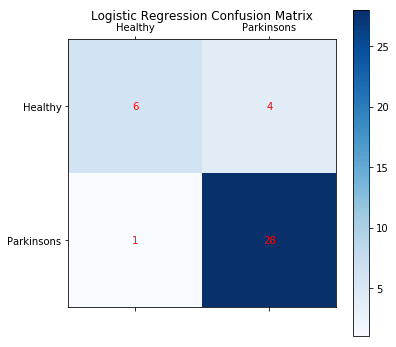

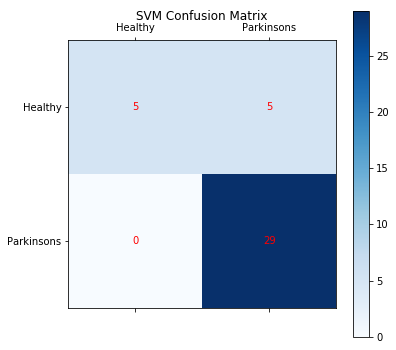

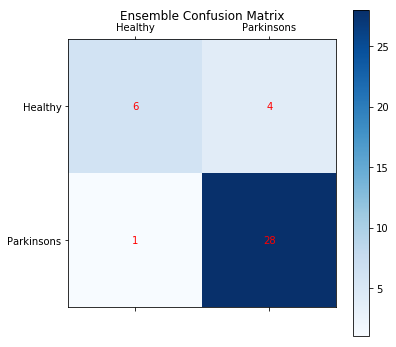

In [94]:
plot_confusion_matrix(confusion_matrix(y_test, lr_test_predict), "Logistic Regression Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, svm_test_predict), "SVM Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, ensemble_test_predict), "Ensemble Confusion Matrix")

From the confusion matrices of the different classifiers we observe that there is a small difference between the performance of all the classifiers. This is seen through similar values in all 4 quadrants of the classifiers confusion matrices.

## Comparison of Ensemble to Base Classifiers
The above matrices and f1_scores of the different classifiers depict the usefulness of voting classifiers to this dataset.


# Project 2 - Abalone Ring Regression
### Summary:
- Download Abalone dataset
- Remove columns
- Divide 90/10
- Train Random Forest
- Perform PCA
- RMSE of Re-Trained Random Forest
- Comparison

### Load and Clean the Data
##### Download the data
##### Load Data from `./abalone.data`

In [248]:
abalone_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

# Download and save the file locally for future use.
with urllib.request.urlopen(abalone_url) as response:
    data = response.read().decode('utf8')
    out = open('./abalone.data', 'w')
    out.write(data)
    out.close()

# Read in the data with the following headings as they are not included in the .data file
abalone_data = pd.read_csv('./abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])

Need to convert the text field for sex into a numerical field so use a Label Encoder to achieve this which will assign an integer to each sex class. This will be further reduced when a scaler is included as this will scale these values integer values between 0 and 1.

In [249]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abalone_data.Sex = le.fit_transform(abalone_data.Sex)
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


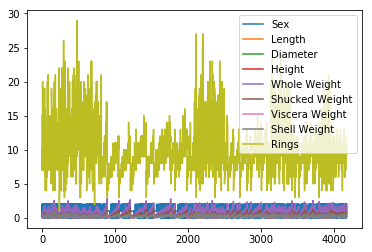

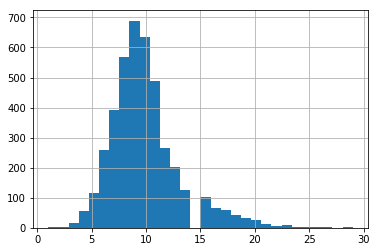

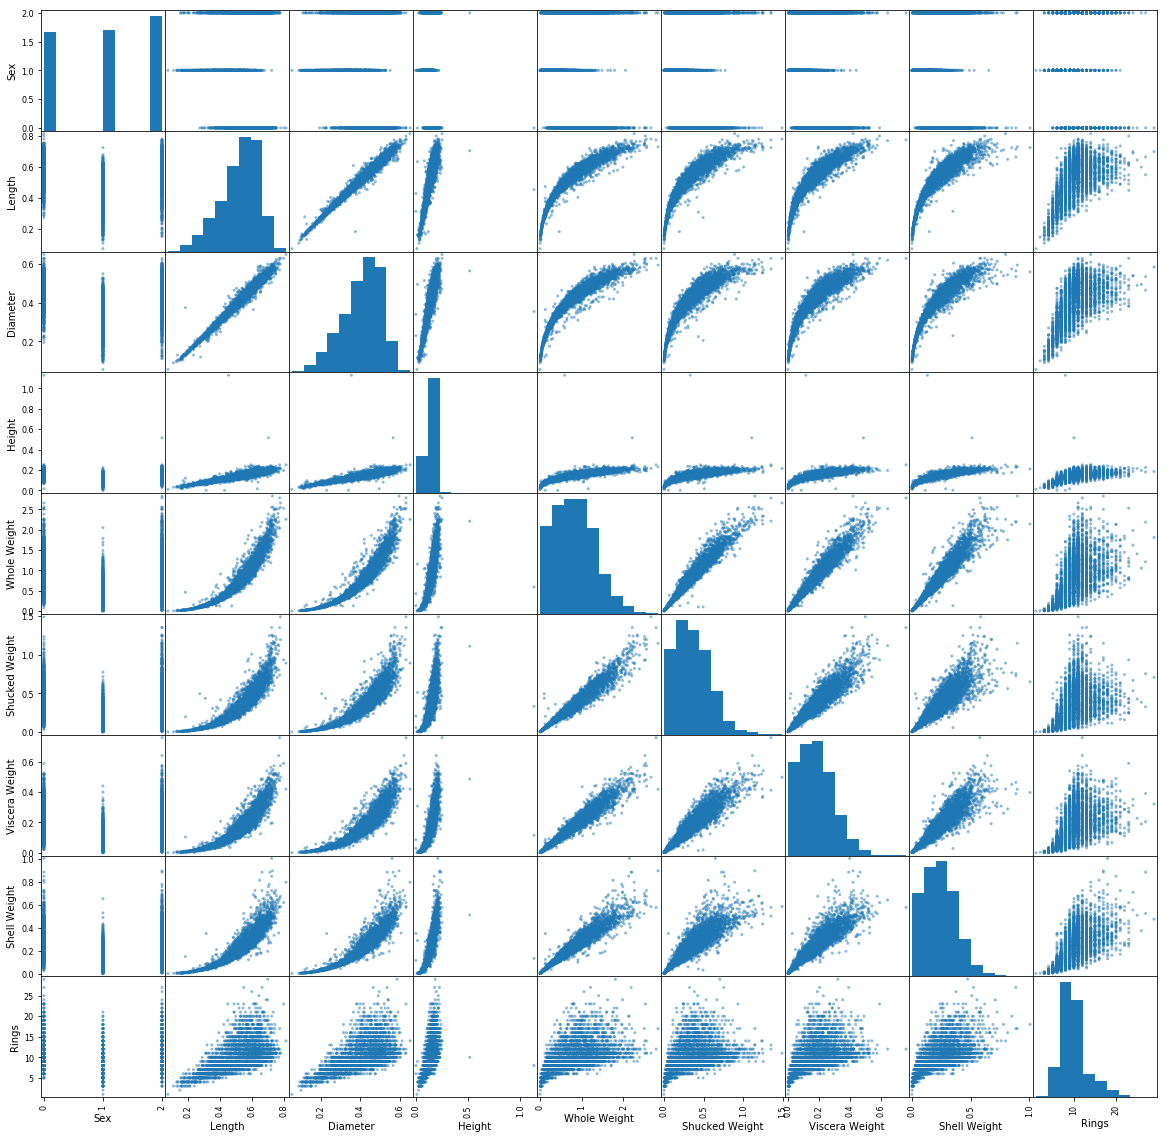

In [250]:
abalone_data.plot()
plt.show()

abalone_data.Rings.hist(bins=30)
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(abalone_data, figsize=(20,20))
plt.show()

We see from the distribution that there are very few of the lower classes in the distribution (1,2,3,4) and from (22 to 29) we should probably remove these from the dataset to improve accuracy of prediction. The .names file suggests grouping from 1-8 improved the accuracy of their classification. When performed here it improveed classification.

In [251]:
def group_abalone_rings(data):
    new_ring_groups = []
    for i, row in data.iterrows():
        if row["Rings"] < 8:
            row["Rings"] = 8
        elif row["Rings"] > 22:
            row["Rings"] = 23
        new_ring_groups.append(row["Rings"])
    return new_ring_groups
    
            
abalone_data.Rings = group_abalone_rings(abalone_data)

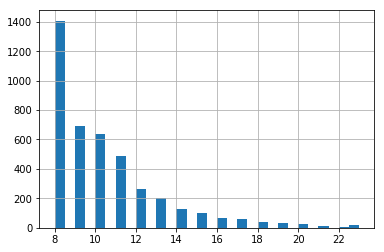

In [252]:
abalone_data.Rings.hist(bins=30)
plt.show()

We can see that the distribution of the rings is much better now.

### Create Training and Test Datasets
Split the data in a 90/10 split for training and testing using a ShuffleSplit as it allows us to split on a given test size quite easily. Although in regression you do not have any classes the stratified shuffle split on the abalone rings appears to increase prediction accuracy as it distributes ring values more evenly which is useful with such imbalanced ring data as seen in the ring distributions above.


In [287]:
from sklearn.model_selection import StratifiedShuffleSplit

# Shuffle the data first then split the dataset with a 90/10 split (training/test).
ss = StratifiedShuffleSplit(train_size=0.9, test_size=0.1, random_state=random_seed)

# Target feature
target = "Rings"

for train_index, test_index in ss.split(abalone_data.iloc[:, :len(abalone_data.columns)-2], abalone_data[target]):
    X_train2, X_test2 = abalone_data.iloc[train_index], abalone_data.iloc[test_index]
    y_train2, y_test2 = abalone_data.iloc[train_index][target], abalone_data.iloc[test_index][target]

# Drop the feature we are trying to predict after the data has been distributed.
X_train2 = X_train2.drop("Rings", axis=1)
X_test2 = X_test2.drop("Rings", axis=1)

Normally we would scale here, but RandomForest is **not** sensitive to feature scaling.

### Fit RandomForestRegressor
We will see which features are most important, remove them and re-train the RFR later on.

In [289]:
from sklearn.ensemble import RandomForestRegressor

# RFR on a scaled feature set
rfr = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=10, random_state=random_seed).fit(X_train2, y_train2)

# Predict on the training set
rfr_train_predict = rfr.predict(X_train2)
# Predict on the testing set
rfr_test_predict = rfr.predict(X_test2)

For the RandomForest Regressor hyperparameters were determined by trial and error, with `criterion='mae'` providing a noticable improvement over `mse`. Increasing the number of estimators to `n_estimators=100` improved the regressor accuracy compared to just using `10`. `min_samples_leaf=10` performed better than other numbers in this area on the test set as it regularised the regressor, stopping it from over-fitting to the training data.


## Dimensional Reduction - Feature Importance
Lets view the feature importance of the RandomForestRegressor and determine which features are least importance and remove them to hopefully reduce dimensionality and increase prediction accuracy.

In [290]:
# Get the feature names from the data
feature_names = list(X_train2)

# Obtain the list of important features by creating a list of tuples with the feature name and its determined importance from
# the RFR model we've fitted.
feature_name_importance = [(feature_names[i], rfr.feature_importances_[i]) for i in range(len(feature_names))]

# Sort the list of tuples in descending order using a lambda which looks at the fractional importance of the feature.
feature_name_importance.sort(key= lambda x: x[1], reverse=True)

# Iterate through all the features and print out all features and their importance, keeping track of when features
# contribute less than 95% of the importance in the model as these will be removed.
unimportant_features = []
feature_value = 0

print("Feature Importance:")
for f in feature_name_importance:
    if feature_value < 0.95:
        feature_value += f[1]
    else:
        unimportant_features.append(f[0])
    print("%s:\t%.6f" % (f[0], f[1]))

# Output the unimportant features that will be removed
print("\nList of Unimportant Features Based on 95% threshold:")
for feat in unimportant_features:
    print(feat)

Feature Importance:
Shell Weight:	0.663128
Shucked Weight:	0.145694
Height:	0.056492
Whole Weight:	0.038874
Sex:	0.034221
Viscera Weight:	0.027147
Diameter:	0.017945
Length:	0.016499

List of Unimportant Features Based on 95% threshold:
Diameter
Length


Based on these results we should remove the Sex and Length threshold. Important to note that this code allows for slightly over 95% of the feature importance to be included however when it was limited to only include features if they contributed to strictly less than 95% the resulting accuracy was worse than with no dimensionality reduction.

In [291]:
# For training and test data sets make a copy and drop the unimportant columns from the sets.
X_train2_import = X_train2.copy()
X_train2_import = X_train2_import.drop(unimportant_features, axis=1)

X_test2_import = X_test2.copy()
X_test2_import = X_test2_import.drop(unimportant_features, axis=1)

# Display the data to show that the columns that were meant to be removed were removed.
X_train2_import.describe()

,Sex,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,1.052142,0.139463,0.829599,0.359702,0.180601,0.239024
std,0.821767,0.042167,0.491409,0.222478,0.109793,0.139621
min,0.000000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.115000,0.440250,0.183250,0.092500,0.130000
50%,1.000000,0.140000,0.802500,0.336500,0.171000,0.235000
75%,2.000000,0.165000,1.158250,0.504250,0.253750,0.328750
max,2.000000,1.130000,2.825500,1.488000,0.760000,1.005000


Re-train the RandomForestRegressor with the same hyper-parameters but with the improvement of using data with only features contibuting 95% of the importance.

In [292]:
rfr_import = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=10, random_state=random_seed).fit(X_train2_import, y_train2)

# Predict on the training set
rfr_import_train_predict = rfr_import.predict(X_train2_import)

# Predict on the testing set
rfr_import_test_predict = rfr_import.predict(X_test2_import)

Lets compare the absolute RMSE of both Regressors, and check that they aren't overfitting by looking at their accuracy on the training set as well.

In [293]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RandomForestRegressor RMSE on test and training dataset predictions
rfr_mse_train = sqrt(mean_squared_error(y_train2, rfr_train_predict))
rfr_mse_test = sqrt(mean_squared_error(y_test2, rfr_test_predict))

# Format output of errors
print("RMSE of Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_mse_train, rfr_mse_test))

# RFR with Feature Importance RMSE 
rfr_import_mse_train = sqrt(mean_squared_error(y_train2, rfr_import_train_predict))
rfr_import_mse_test = sqrt(mean_squared_error(y_test2, rfr_import_test_predict))

# Format output of errors
print("RMSE of Feature Importance Reduced Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_import_mse_train, rfr_import_mse_test))

RMSE of Random Forest Regressor:
Training Set: 2.051870	Test Set: 2.143634

RMSE of Feature Importance Reduced Random Forest Regressor:
Training Set: 1.989700	Test Set: 2.100800



As expected we see that when the dimensionality of the features is reduced to only include the most important features (features which occur higher in the random forest trees) the accuracy of the regressor increases, although the increase is not substantial only changing from `2.312` to `2.300` on the test set.

Lets compare the absolute errors of each of the estimators using a bar graph for each of the test instances.

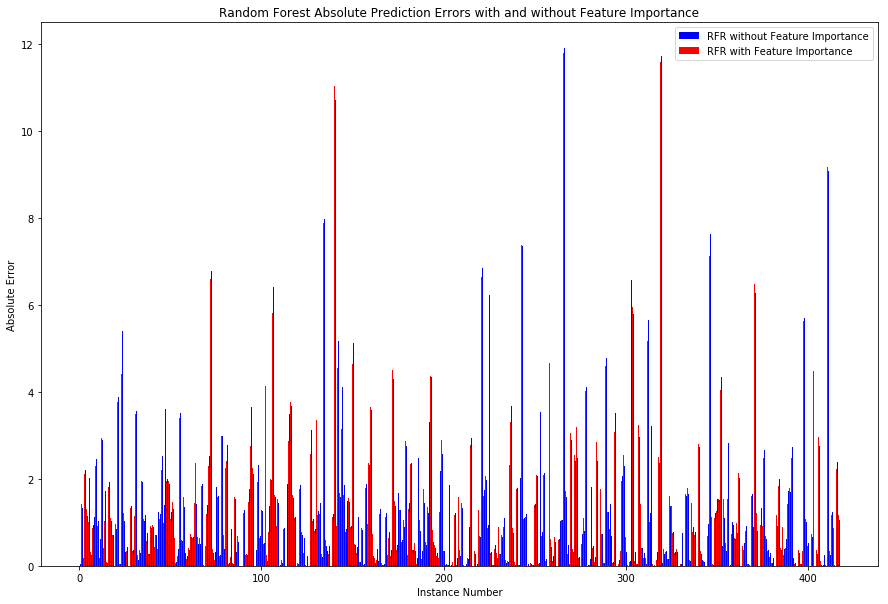

In [298]:
importance_errors = []
default_errors = []

# Store the absolute errors from the test on each model.
for indx, inst in enumerate(y_test2):
    importance_errors.append(abs(inst - rfr_import_test_predict[indx]))
    default_errors.append(abs(inst - rfr_test_predict[indx]))

import numpy as np 

x = np.arange(0, len(default_errors), 1).tolist()
x1 = np.arange(0.5, len(default_errors), 1).tolist()


plt.figure(figsize=(15,10))
plt.title("Random Forest Absolute Prediction Errors with and without Feature Importance")
plt.xlabel("Instance Number")
plt.ylabel("Absolute Error")
plt.bar(x1, default_errors, color='b', width=0.5, label="RFR without Feature Importance")
plt.bar(x, importance_errors, color='r', width=0.5, label="RFR with Feature Importance")
plt.legend()
plt.show()

We see that although both the estimators with and without feature importance achieve similar results, the estimator without unimportant features removed (blue) appears to have large estimation errors on some instances.

## Dimensional Reduction - PCA

Lets apply PCA to retain 99.7% of the variance and remove the unneeded features based on this method and then retrain and compare the results of all 3 models. Threshold of 99.7% was chosen as 95% excluded too many features resulting in inaccurate predictions.

In [295]:
from sklearn.decomposition import PCA

# Apply PCA and only keep 0.997 of the explained variance and 0.95 only keeps 1 feature which is not accurate enough.
pca = PCA(n_components=0.997, copy=True, random_state=random_seed)

# Fit and transform using the training data
X_train2_pca_red = pca.fit_transform(X_train2)

# Apply the transformation to the test data as well.
X_test2_pca_red = pca.transform(X_test2)

# Output the explained variance
print(pca.explained_variance_ratio_)

[0.6598739  0.33127802 0.0038558  0.00287474]


Re-train a RandomForestRegressor using the same hyper-parameters as before but with the benefit of only using the remaing features contributing to the variance, as determined by PCA. This removes half of the features lowering it to only 4 used in predictions.

## Dimensional Reduction Technique Comparison

In [296]:
rfr_pca_red = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=10, random_state=random_seed).fit(X_train2_pca_red, y_train2)

# Predict on the training dataset to check we aren't overfitting
y_pca_train2_predict = rfr_pca_red.predict(X_train2_pca_red)

# Predict on the test dataset to determine model accuracy compared with other models.
y_pca_test2_predict = rfr_pca_red.predict(X_test2_pca_red)

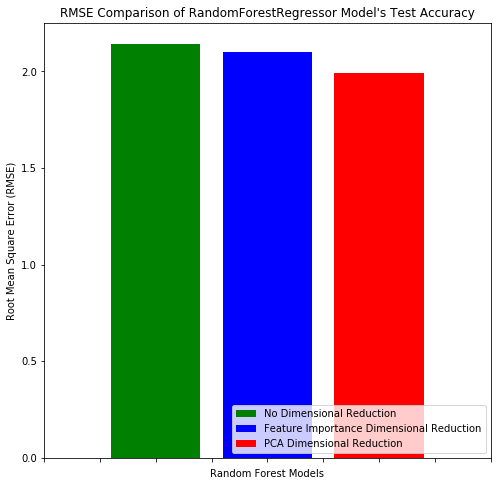

RMSE of Baseline Random Forest Regressor:
Training Set: 2.051870	Test Set: 2.143634

RMSE of Feature Importance Reduced Random Forest Regressor:
Training Set: 1.989700	Test Set: 2.100800

RMSE of Variance Reduced Random Forest Regressor:
Training: 1.883415	Test: 1.993055



In [297]:
# RandomForestRegressor with PCA variance reduction determine the MSE
rfr_red_mse_train = sqrt(mean_squared_error(y_train2, y_pca_train2_predict))
rfr_red_mse_test = sqrt(mean_squared_error(y_test2, y_pca_test2_predict))

# Plot bar graph of RMSE between different reduction techniques
plt.figure(figsize=(8,8))
plt.title("RMSE Comparison of RandomForestRegressor Model's Test Accuracy")
plt.bar([0], [rfr_mse_test], label='No Dimensional Reduction', color='g')
plt.bar([1], [rfr_import_mse_test], label='Feature Importance Dimensional Reduction', color='b')
plt.bar([2], [rfr_red_mse_test], label="PCA Dimensional Reduction", color='r')
plt.ylabel("Root Mean Square Error (RMSE)")
plt.xlabel("Random Forest Models")

# Remove x-axis labels as they don't mean anything
locs, labels = plt.xticks()
labels = ["" for i in range(len(locs))]
plt.xticks(locs, labels)

# Display the graph plus the legend
plt.legend(loc='lower right')
plt.show()

# Output Raw values
# No Dimensional Reduction
print("RMSE of Baseline Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_mse_train, rfr_mse_test))

# Dimensional Reduction with Feature Importance
print("RMSE of Feature Importance Reduced Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_import_mse_train, rfr_import_mse_test))

# Dimensional Reduction with PCA
print("RMSE of Variance Reduced Random Forest Regressor:\nTraining: %.6f\tTest: %.6f\n" % (rfr_red_mse_train, rfr_red_mse_test))

After the model has been retrained with PCA to reduce dimensionality of features that account for less than 0.03% of the variance in the data, we observe that this Random Forest Regressor improves its prediction accuracy over the other Regressors. 

### Conclusion
We observe that reducing dimensionality with PCA provides greater benefit than using feature importance, or no reduction in dimensionality. Feature importance as a dimensional reduction technique does not provide as much benefit as PCA but is better than no dimensional reduction. These results can be explained by the fact that 